## Puthon Code for Image Classification

## There are many different machine learning models that can be used for image classification tasks, including:

### 1. K-nearest neighbors (KNN)
### 2. Logistic regression
### 3. Support vector machines (SVMs)
### 4. Decision trees and random forests
### 5. Neural networks, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs)
### 6. Boosting algorithms, such as AdaBoost and gradient boosting
### 7. Deep learning models, such as convolutional neural networks (CNNs) and deep neural networks (DNNs)

# Data Descriptions: Caltech-256

### The Caltech-256 dataset is a large dataset of images organized into 256 object categories. It consists of 30,607 images in total,there are a minimum of 
### 80 images and a maximum of 800 images per category.
### -The images are annoted with object labels witha size of 256x256 pixels.
### -This dataset is very challenging due to the large number of classes.
### -the dataset come from a variety of sources
### -such as digital cameras, scans, and clip art
### -also include a wide range of objects and scenes


### I haves used this dataset in this project to train the machine learning models for object recognition in images
### -to evaluate the image classification models performance

# Loading python library

# Convolutional Neural Network (CNN)

In [21]:
!pip3 install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)


In [44]:
#pip install "tensorflow>=2.0.0"
import sys
import os
import numpy as np
import pandas as pd
#import tensorflow as tf
from PIL import Image  ## Python image library
from sklearn.preprocessing import LabelEncoder  ## library for preprocessing the data
from sklearn.model_selection import train_test_split  ## library to split the dataset into training and test set
from tensorflow.keras.utils import to_categorical


In [45]:
import matplotlib.pyplot as plt

### Load the image dataset

In [29]:
import tarfile

# Open the tar file
tar = tarfile.open('C:/Users/mdsak/Downloads/256_ObjectCategories.tar', 'r')

# Extract the contents of the tar file
df=tar.extractall()

# Close the tar file
tar.close()


In [33]:
import tarfile
import shutil

# Open the tar file
tar = tarfile.open('C:/Users/mdsak/Downloads/256_ObjectCategories.tar', 'r')

# Extract the contents of the tar file to a temporary directory
tar.extractall()

# Iterate over the extracted files and directories
for member in tar.getmembers():
  # Check if the member is a file
  if member.isfile():
    # Get the path of the file
    file_path = member.name

    # Copy the file to the desired location
    shutil.copy(file_path, 'C:/Users/mdsak/Downloads')

# Close the tar file
tar.close()


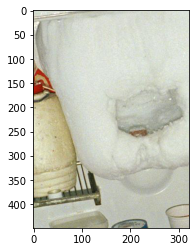

In [46]:
# Open the Caltech256 dataset
#tar = tarfile.open('C:/Users/mdsak/Downloads/256_ObjectCategories.tar', 'r')
# Extract an image from the tar file
#tar.extract('image_class/257_0810.jpg')

# Load the image
image_path = 'C:/Users/mdsak/Downloads/257_0810.jpg'
image = Image.open(image_path)

# Display the images
plt.imshow(image)
plt.show()


In [48]:
# Load the Caltech256 dataset
# divide the dataset into train and test set
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 57s 0us/step


In [49]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [53]:
# build the model
# convolution neural network model
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                          input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

## Convolutional Neural Network (CNN) is being defined using the tf.keras.Sequential model in TensorFlow
### -The CNN consists of a series of layers, each of which performs a specific function in the model.

### CNN breakdown

## tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)): 
### -This layer is a convolutional layer that applies 32 filters of size 3x3 to the input data. 
### -The input_shape parameter specifies the shape of the input data, 
### -which in this case is an image with 32x32 pixels and 3 color channels (RGB). 
### -activation function RELU :Rectified Linear Unit, a commonly used activation function

## tf.keras.layers.MaxPooling2D((2, 2)): 
### -This layer is a max pooling layer that downsamples the input data by taking the maximum value of each 2x2 region.

## tf.keras.layers.Conv2D(64, (3, 3), activation='relu'): 
### -This layer is another convolutional layer that applies 64 filters of size 3x3 to the input data.

## tf.keras.layers.MaxPooling2D((2, 2)): 
### -This is another max pooling layer that downsamples the input data.

## tf.keras.layers.Conv2D(64, (3, 3), activation='relu'):
### -This is another convolutional layer that applies 64 filters of size 3x3 to the input data.

## tf.keras.layers.Flatten(): 
### -This layer flattens the input data into a 1D vector, which is necessary for the input data to be fed into a dense layer.

## tf.keras.layers.Dense(64, activation='relu'): 
### -This layer is a dense (fully connected) layer that applies 64 units to the input data. 
### -The activation parameter specifies the activation function to use, which in this case is the ReLU function.

## tf.keras.layers.Dense(10, activation='softmax'): 
### -This is the output layer of the model, which has 10 units and uses the softmax activation function. 
### -The softmax activation function is often used in classification tasks to produce a probability distribution over the possible classes.

## Model learning process
### -'optimizer' : specifies the optimizer to train the model
### -'adam' : popular optimizer for machine learning model
### -'loss': loss function to measure the performance of the model prediction
### -'sparse_categorical_crossentropy': loss function is often used for classification tasks with integer labels.
### -'metrics': metrics for evalauting the model
### -'accuracy': common metric for classification

In [54]:
## comple the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Now train the machine learning model
model.fit(x_train,y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4927 - accuracy: 0.4582
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1382 - accuracy: 0.5989
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9910 - accuracy: 0.6525
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8918 - accuracy: 0.6858
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8130 - accuracy: 0.7158
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7539 - accuracy: 0.7367
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6980 - accuracy: 0.7566
Epoch 8/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6506 - accuracy: 0.7736
Epoch 9/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.6060 - accuracy: 0.7863
Epoch 10/10
1563/1563 [==============================] - 78s 50m

NameError: name 'x_text' is not defined

In [55]:
## evaluate the model
test_loss, test_accuracy=model.evaluate(x_test,y_test)
print('Test Acccuracy',test_accuracy)

313/313 [==============================] - 6s 18ms/step - loss: 0.8887 - accuracy: 0.7061
Test Acccuracy 0.7060999870300293


In [56]:
# Convert the labels to one-hot encoded vectors
num_classes = 256
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [57]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
# Define the CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes))
model.add(tf.keras.layers.Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
1563/1563 [==============================] - 255s 160ms/step - loss: 1.5893 - accuracy: 0.4230 - val_loss: 1.1222 - val_accuracy: 0.6002
Epoch 2/10
1563/1563 [==============================] - 249s 159ms/step - loss: 1.1179 - accuracy: 0.6047 - val_loss: 0.9255 - val_accuracy: 0.6775
Epoch 3/10
1563/1563 [==============================] - 233s 149ms/step - loss: 0.9348 - accuracy: 0.6726 - val_loss: 0.8278 - val_accuracy: 0.7102
Epoch 4/10
1563/1563 [==============================] - 250s 160ms/step - loss: 0.8508 - accuracy: 0.7022 - val_loss: 0.7609 - val_accuracy: 0.7423
Epoch 5/10
1563/1563 [==============================] - 264s 169ms/step - loss: 0.7860 - accuracy: 0.7256 - val_loss: 0.7452 - val_accuracy: 0.7397
Epoch 6/10
1563/1563 [==============================] - 264s 169ms/step - loss: 0.7338 - accuracy: 0.7440 - val_loss: 0.7436 - val_accuracy: 0.7466
Epoch 7/10
1563/1563 [==============================] - 251s 160ms/step - loss: 0.6965 - accuracy: 0.7565 - val_